# Portfolio and Hedging Mechanics

This notebook aims to simulate:
- Holding an option
- Dynamically hedging the option
- Tracking portfolio value, and hedging ratio over time

*Our primary goal involves visualising how hedging reduces exposure to underlying 
price movements*



In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import sys
sys.path.append('../utils')
from gbm import simulate_gbm_path
from bsm import bs_call_price, bs_put_price, bs_delta

In [26]:
# GBM Parameters

S0 = 100
K = 100
r = 0.05
mu = 0.05
sigma = 0.2
T = 1.0
T_steps = 252
dt = T / T_steps

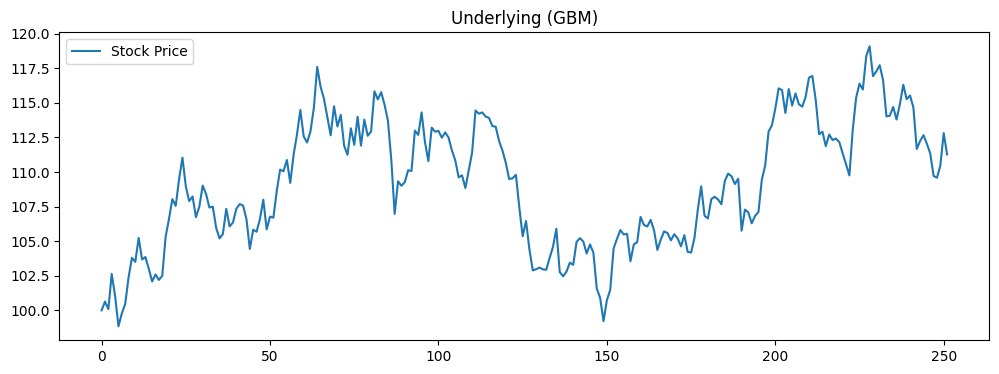

In [37]:
# Initialise Portfolio

option_values = np.zeros(T_steps)
deltas = np.zeros(T_steps)
stock_positions = np.zeros(T_steps)
cash_positions = np.zeros(T_steps)
portfolio_values = np.zeros(T_steps)

prices = simulate_gbm_path()
plt.figure(figsize=(12,4))
plt.plot(prices, label="Stock Price")
plt.title("Underlying (GBM)")
plt.legend()
plt.show()

In [45]:
# Simulating Delta Hedging

for t in range(T_steps):
    tau = T - t*dt
    if(tau <= 0):
        tau = 1e-8
    option_values[t] = bs_call_price(prices[t], K, r, sigma, tau)
    deltas[t]  = bs_delta(prices[t], K, r, sigma, tau)

    if(t > 0):
        # adjust hedge
        delta_change = deltas[t] - deltas[t - 1]
        cash += delta_change * prices[t]
        cash *= np.exp(r * dt)
    else:
        cash = deltas[0] * prices[0]
    stock_positions[t] = deltas[t]
    portfolio_values[t] = option_values[t] - deltas[t] * prices[t] + cash

### Relevant Plots

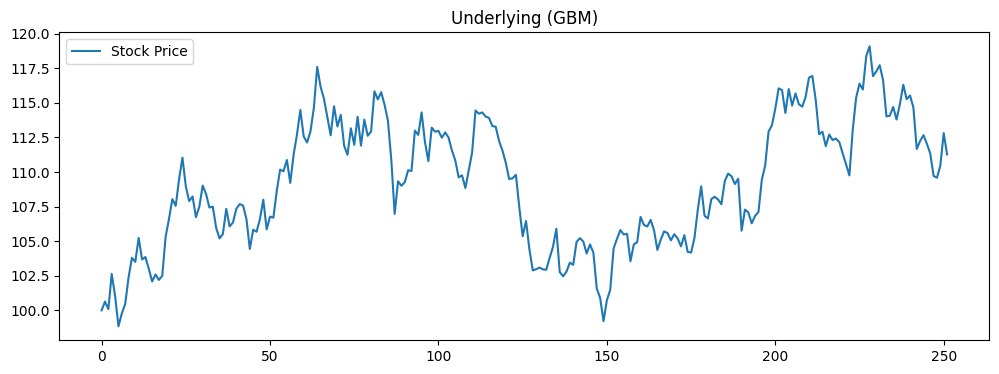

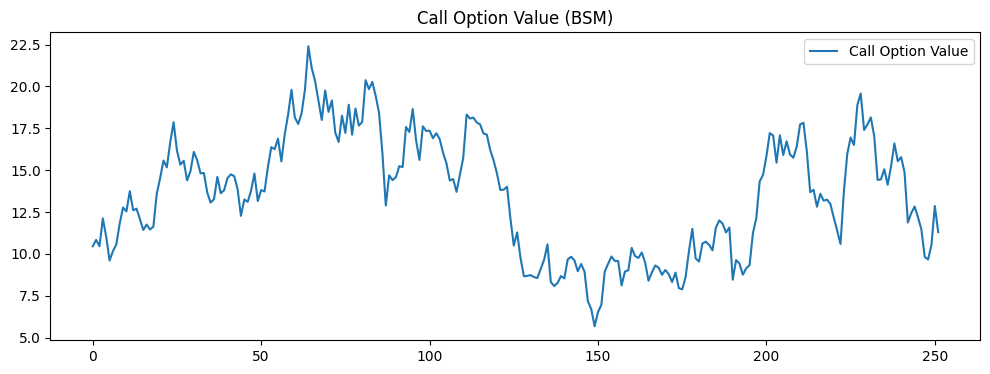

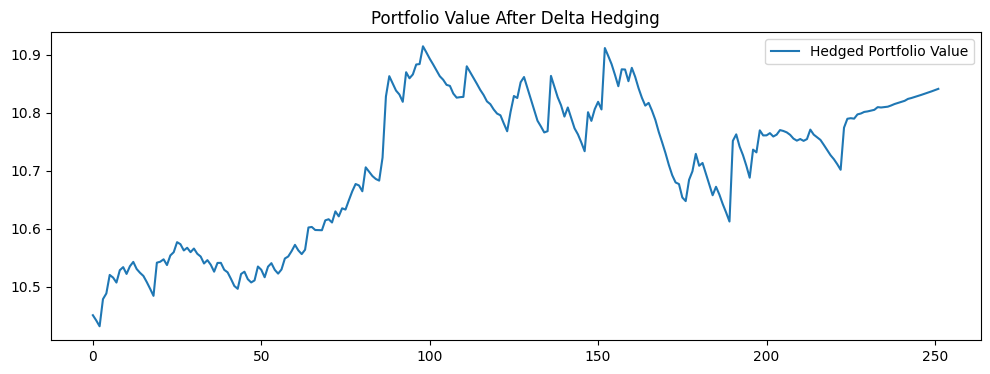

In [46]:
plt.figure(figsize=(12,4))
plt.plot(prices, label="Stock Price")
plt.title("Underlying (GBM)")
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(option_values, label="Call Option Value")
plt.title("Call Option Value (BSM)")
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(portfolio_values, label="Hedged Portfolio Value")
plt.title("Portfolio Value After Delta Hedging")
plt.legend()
plt.show()